**MCMC-Example**<br>
Beta distribution<br>
${f(x)} = {Cx^{\alpha-1}}{(1-x)}^{\beta-1}$

In [7]:
import random
import pylab as pl
import scipy.special as ss
from scipy.stats import beta
import numpy as np

%matplotlib inline
pl.rcParams['figure.figsize'] = (17.0, 4.0)

In [12]:
# Lets define our Beta Function to generate s for any particular state. We don't care for the normalizing constant here.
def beta_s(w, a, b):
    return w**(a-1)*(1-w)**(b-1)

# This Function returns True if the coin with probability P of heads comes heads when flipped.
def random_coin(p):
    unif = random.uniform(0,1)
    if unif>=p:
        return False 
    else:
        return True

# This Function runs the MCMC chain for Beta Distribution.
def beta_mcmc(N_hops,a,b):
    states = []
    cur = random.uniform(0,1)
    for i in range(0, N_hops):
        states.append(cur)
        next = random.uniform(0,1)
        ap = min(beta_s(next,a,b)/beta_s(cur,a,b), 1) # Calculate the acceptance probability
        if random_coin(ap):
            cur = next
    return states[-1000:] # Returns the last 100 states of the chain

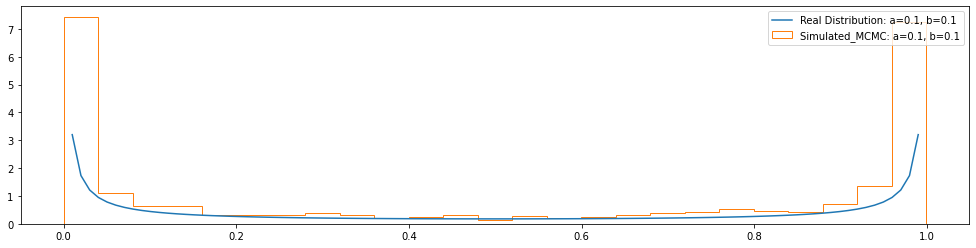

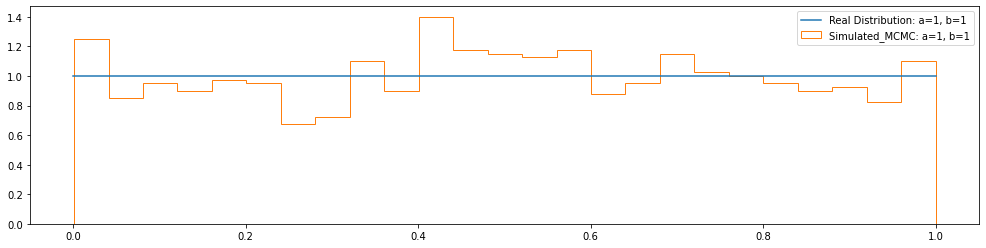

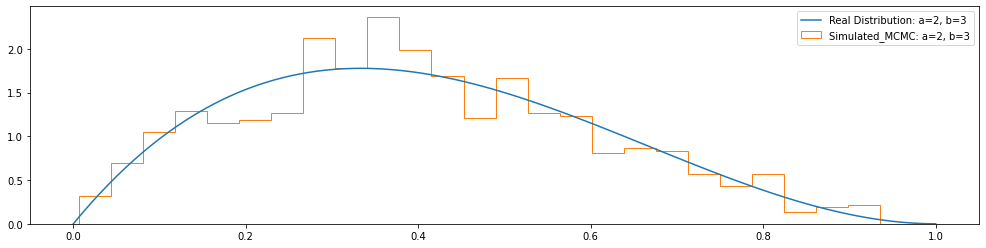

In [13]:
# Actual Beta PDF.
def beta2(a, b, i):
    e1 = ss.gamma(a + b)
    e2 = ss.gamma(a)
    e3 = ss.gamma(b)
    e4 = i  (a - 1)
    e5 = (1 - i)  (b - 1)
    if (e2*e3)==0:
        return 0
    else:
        return (e1/(e2*e3)) * e4 * e5

# Create a function to plot Actual Beta PDF with the Beta Sampled from MCMC Chain.
def plot_beta(a,b):
    Ly = []
    Lx = []
    i_list = np.mgrid[0:1:100j]
    for i in i_list:
        Lx.append(i)
        Ly.append(beta.pdf(i, a, b))
        
        
    pl.plot(Lx, Ly, label="Real Distribution: a="+str(a)+", b="+str(b))
    pl.hist(beta_mcmc(1000,a,b), density=True,bins =25, histtype='step',label="Simulated_MCMC: a="+str(a)+", b="+str(b))
    pl.legend()
    pl.show()
    
plot_beta(0.1,0.1)
plot_beta(1,1)
plot_beta(2,3)

